# **Visualizing adversarial success rates**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
def process_paths(measurement_case, create_dir=True,
                  base_result_path = "../../results/",
                  base_doc_path = "../../doc/",
                  train_round=None):
    """
        Calculates and creates (if needed) paths for visualizing.
        Parameters:
            - measurement_case: measurement name (directory in results directory)
            - create_dir: creates directory in doc folder if True and the target plot directory does not exist
            - base_result_path: path to the results directory
            - base_doc_path: path to the doc directory
            - train_round: which round to use
    """
    meas_path = base_result_path + measurement_case + ("/" if train_round is None else "/round%d/"%train_round)
    plot_path = base_doc_path + measurement_case + "/" 
    
    if (create_dir) and (not(os.path.isdir(plot_path))):
        os.mkdir(plot_path)
    return meas_path, plot_path

## Raw measurements

Plotting accuracy per digit per participants

In [63]:
def plot_raw_accuracies(meas_case, train_round=0, numeric_client=True):
    measurement_path, plot_save_path = process_paths(meas_case, train_round=train_round)
    acc_data = pd.read_csv(measurement_path+"adv_results.csv")
    if not(numeric_client):
        for i in range(10):
            acc_data["name"] = acc_data["name"].replace(to_replace="client%d"%i, value="participant"+chr(ord('A')+i))
    fig = plt.figure(figsize=[15, 5])
    ax=fig.add_subplot(111, label="", frame_on=False)
    ax2=fig.add_subplot(111, label="", frame_on=False)
    x1 = [i for i in range(0, 10, 2)]
    y = [1.0 for i in range(5)]
    
    '''sns.boxplot(x = "digit", y="accuracy", hue="name", data=acc_data,
               hue_order=["client%d"%i for i in range(10)] if numeric_client else ["client"+chr(ord('A')+i) for i in range(10)],
               whis=[.95, 1.15], 
               showfliers=False)'''
    ax2.axhline(1.0, color="red", linestyle="dotted")
    sns.boxplot(x = "name", y="accuracy", hue="digit", data=acc_data,
               order=["client%d"%i for i in range(10)] if numeric_client else ["participant"+chr(ord('A')+i) for i in range(10)],
               showfliers=False, ax=ax2)#orient="h")
    
    ax.bar(x1, y, width=1.0, color="lightsteelblue", align="edge", alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([0,10])
    plt.title("Accuracy of participants on different digits\n(%s)"%meas_case)
    plt.legend(title="digit", ncol=2, loc="lower left")
    plt.xlabel("")
    plt.ylim((0.45, 1.05))
    
    

## **Comparisons**

In [3]:
meas_cases = ["fed_iid", "fed_noshare", "fed_changeshare"]
meas_label = ["IID", "non-IID", "data exchange"]
meas_marker = ["x", "o", "d"]
meas_color = ["black", "gray", "black"]

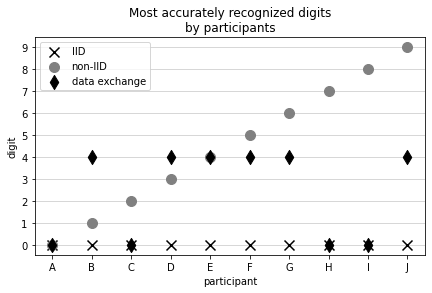

In [22]:
plt.figure(figsize=[7,4])

for i, mc in enumerate(meas_cases):
    meas_path, plot_save_path = process_paths(mc, train_round=3)
    acc_data = pd.read_csv(meas_path + "adv_results.csv")
    
    acc_per_client_per_digit = acc_data.groupby(["name", "digit"]).mean("accuracy")["accuracy"]
    x = np.arange(10)
    y = []
    for cl_idx in range(10):
        y.append(np.argmax(acc_per_client_per_digit["client%d"%cl_idx]))
    plt.scatter(x,y, s=100, color=meas_color[i], marker=meas_marker[i], label=meas_label[i], zorder=2)
    
plt.xlabel("participant")
plt.ylabel("digit")
plt.legend()
plt.xticks(ticks=range(0, 10), labels=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])
plt.yticks(ticks=range(0, 10))

plt.grid(axis="y", linewidth=.5, zorder=1)
plt.title("Most accurately recognized digits\nby participants")

plt.show()

### IID without sharing

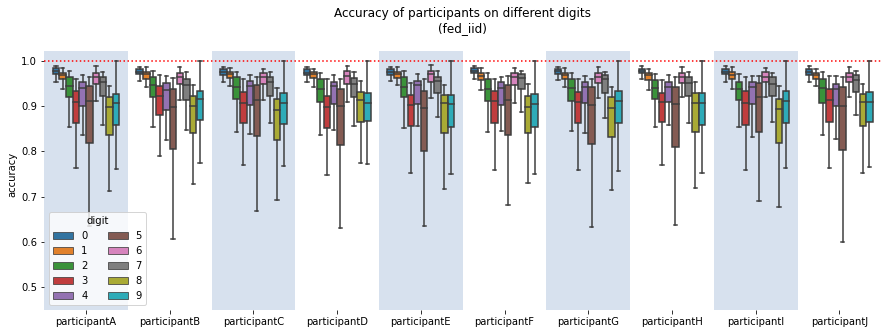

In [64]:
plot_raw_accuracies("fed_iid", numeric_client=False)

### NONIID50 without sharing

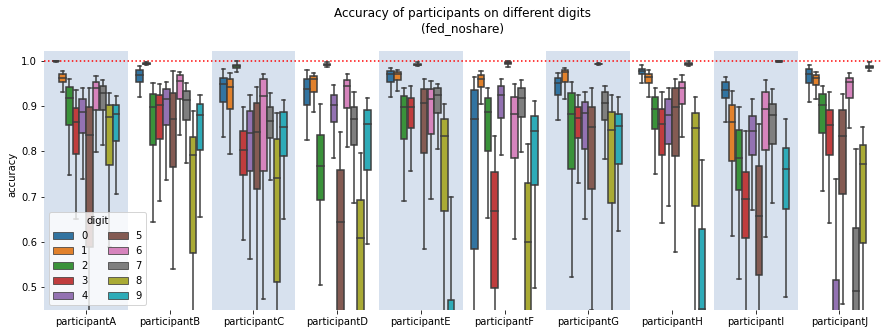

In [65]:
plot_raw_accuracies("fed_noshare", numeric_client=False)

### Sharing minimal fix amount

Text(0.5, 1.0, 'Accuracy of participants on different digits\n(fed_presel)')

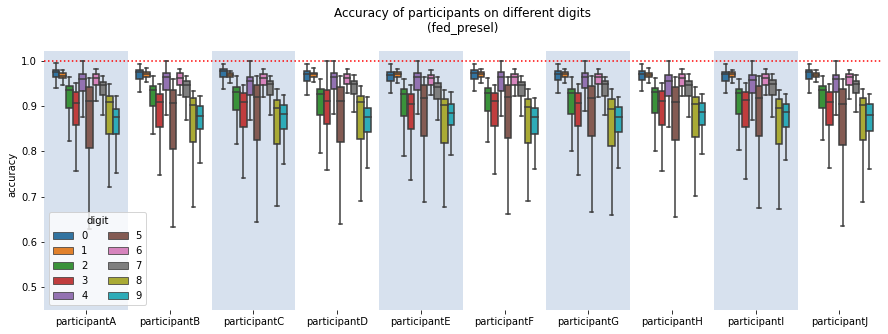

In [66]:
plot_raw_accuracies("fed_fixshare", train_round=3, numeric_client=False)
plt.title("Accuracy of participants on different digits\n(fed_presel)")

### Sharing minimal changing amount

Text(0.5, 1.0, 'Accuracy of particiapnts on different digits\n(fed_resel)')

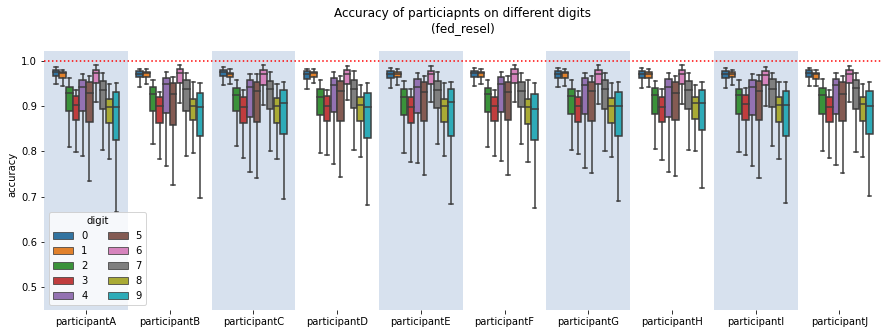

In [67]:
plot_raw_accuracies("fed_changeshare", train_round=7, numeric_client=False)
plt.title("Accuracy of participants on different digits\n(fed_resel)")

## Processed values

In [4]:
measurements = ["fed_iid", "fed_noshare", "fed_fixshare", "fed_changeshare"]
n_rounds = 10

In [5]:
for meas in measurements:
    avg_acc = 0
    for r in range(n_rounds):
        measurement_path, plot_save_path = process_paths(meas, train_round=r)
        acc_data = pd.read_csv(measurement_path+"adv_results.csv")
        acc_data = acc_data[acc_data["name"] !=  "global"]
        accuracy = 0
        for digit in range(10):
            digit_data = acc_data[acc_data["digit"] == digit]
            grouped_digit = digit_data.groupby("name").mean("accuracy")
            best_client = grouped_digit["accuracy"].idxmax()
            print(digit, best_client)
            if "client%d"%digit == best_client:
                accuracy+=1
        avg_acc += accuracy/10
    print("------------\n%s:\t\t%.4f\n\n"%(meas, avg_acc/n_rounds))

0 client5
1 client4
2 client4
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client4
2 client4
3 client1
4 client4
5 client8
6 client9
7 client5
8 client3
9 client8
0 client7
1 client4
2 client4
3 client7
4 client3
5 client2
6 client9
7 client5
8 client3
9 client1
0 client6
1 client4
2 client4
3 client9
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client4
2 client0
3 client1
4 client7
5 client8
6 client9
7 client5
8 client3
9 client9
0 client7
1 client4
2 client0
3 client1
4 client7
5 client8
6 client4
7 client5
8 client3
9 client1
0 client5
1 client4
2 client4
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client5
1 client4
2 client0
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client0
1 client4
2 client0
3 client1
4 client2
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client6
2 client4
3 client1
4 client7
5 client8
6 client6
7 client5
8 client3
9 client1


In [10]:
for i, mc in enumerate(meas_cases):
    accuracy = 0
    for r in range(n_rounds):
        meas_path, plot_save_path = process_paths(mc, train_round=r)
        acc_data = pd.read_csv(meas_path + "adv_results.csv")

        acc_per_client_per_digit = acc_data.groupby(["name", "digit"]).mean("accuracy")["accuracy"]
        y = []
        for cl_idx in range(10): #per client accuracy
            y.append(np.argmax(acc_per_client_per_digit["client%d"%cl_idx]) == cl_idx)
        accuracy += np.sum(y)
        if (mc=="fed_changeshare") and (np.sum(y)>1.0):
            print(r)
    
    accuracy = accuracy/n_rounds
    print("%s:\t%.4f"%(mc, accuracy))

fed_iid:	1.0000
fed_noshare:	10.0000
3
fed_changeshare:	1.1000
